In [1]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [2]:
types = {'B_ID':8, 'E_ID':17, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("./po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = np.asarray(temp)
            temp = temp[:,:2].astype(np.float64)
        except:
            print(ids, i)
        print(temp.shape)
        x_val.append(temp.tolist())
x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=2500)).astype(np.float64)
print("x_val shape:", x_val.shape)
# len(x_val[1][0])

(505, 2)
(904, 2)
(479, 2)
(552, 2)
(996, 2)
(697, 2)
(561, 2)
(880, 2)
(1134, 2)
(799, 2)
(652, 2)
(591, 2)
(435, 2)
(520, 2)
(948, 2)
(602, 2)
(437, 2)
(928, 2)
(853, 2)
(754, 2)
(599, 2)
(568, 2)
(518, 2)
(507, 2)
(551, 2)
(520, 2)
(570, 2)
(912, 2)
(1094, 2)
(920, 2)
(1135, 2)
(627, 2)
(535, 2)
(417, 2)
(507, 2)
(714, 2)
(444, 2)
(314, 2)
(568, 2)
(838, 2)
(1003, 2)
(783, 2)
(817, 2)
(898, 2)
(1515, 2)
(577, 2)
(621, 2)
(399, 2)
(777, 2)
(526, 2)
(623, 2)
(813, 2)
(2487, 2)
(699, 2)
(288, 2)
(706, 2)
(1222, 2)
(405, 2)
(974, 2)
(1094, 2)
(1003, 2)
(1159, 2)
(596, 2)
(502, 2)
(1221, 2)
(781, 2)
(1543, 2)
(392, 2)
(568, 2)
(459, 2)
(476, 2)
(605, 2)
(499, 2)
(540, 2)
(453, 2)
(658, 2)
(532, 2)
(700, 2)
x_val shape: (78, 2500, 2)


In [3]:
df = pd.read_excel("./KiMoRe/E_ID1/Es1/Label/ClinicalAssessment_E_ID1.xlsx")
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("./KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[1])
po_val = np.asarray(po_val)
cf_val = np.asarray(cf_val)
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)

/home/yash/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


shape of CF:  (78,)
shape of PO:  (78,)


In [4]:
input1 = Input(shape = (None,), name = 'ip1')
embed1 = layers.Embedding(64, 2501, mask_zero = True)(input1)
encoded_input1 = layers.LSTM(32)(embed1)
input2 = Input(shape = (None,), name = 'ip2')
embed2 = layers.Embedding(64, 2501)(input2)
encoded_input2 = layers.LSTM(32)(embed2)
concatenated = layers.concatenate([encoded_input1, encoded_input2],
axis=-1)
output = layers.Dense(1,activation='softmax')(concatenated)
model = Model([input1, input2], output);
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'],ver)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ip1 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
ip2 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 2501)   160064      ip1[0][0]                        
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 2501)   160064      ip2[0][0]                        
______________________________________________________________________________________________

In [5]:
x_val /= np.max(np.abs(x_val))
po_val /= np.max(np.abs(po_val))
x_train, x_test, y_train, y_test = train_test_split(x_val,po_val, test_size=0.3)

In [6]:
x_train[:,:,1].shape

(54, 2500)

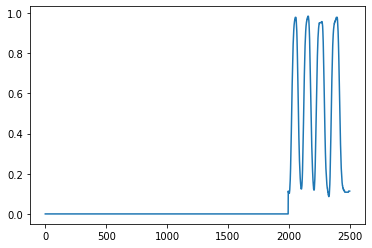

In [7]:
plt.plot(x_val[0,:,:1])

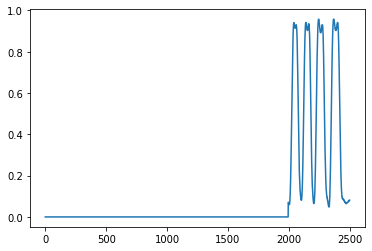

In [8]:
plt.plot(x_val[0,:,1:])

In [125]:
history = model.fit([x_train[:,:,0], x_train[:,:,1]], y_train,epochs=100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 181ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 80ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 164ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 76ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 81ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 75ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 78ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 82ms/step - loss: na